In [204]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
x,y,z,n,L,nx,ny,nz,Lx,Ly,Lz=sp.symbols('x y z n L nx ny nz Lx Ly Lz', real=True)

m=const.m_e
a0=const.physical_constants['Bohr radius'][0]
hbar=1

In [205]:
nPoints = 100
L = 5
m = 1
a = L/(nPoints+1)
t = (hbar**2)/(2*m*a*a)
psi1D=sp.lambdify('n,L,x',(sp.sqrt(2/L) * sp.sin(n * sp.pi * x/L)))
Energy1D = sp.lambdify('n,L',((hbar*np.pi*n/L)**2)/(2*m))

In [206]:
hMatr = np.zeros((nPoints,nPoints))


In [207]:
for i in range(nPoints):
    hMatr[i,i] =2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
        
hMatr

array([[ 408.04, -204.02,    0.  , ...,    0.  ,    0.  ,    0.  ],
       [-204.02,  408.04, -204.02, ...,    0.  ,    0.  ,    0.  ],
       [   0.  , -204.02,  408.04, ...,    0.  ,    0.  ,    0.  ],
       ...,
       [   0.  ,    0.  ,    0.  , ...,  408.04, -204.02,    0.  ],
       [   0.  ,    0.  ,    0.  , ..., -204.02,  408.04, -204.02],
       [   0.  ,    0.  ,    0.  , ...,    0.  , -204.02,  408.04]])

In [208]:
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
print('First 5 Eigenvalues by finite difference method:\n',list(np.sort(eigenvalues)[0:5]))
print('\nFirst 5 Exact Eigenstates:\n',list(Energy1D(np.array([1,2,3,4,5]),L)))

First 5 Eigenvalues by finite difference method:
 [0.1973761735772247, 0.7893137456081251, 1.7752400547215494, 3.1542012808887043, 4.924863368181697]

First 5 Exact Eigenstates:
 [0.197392088021787, 0.789568352087148, 1.776528792196083, 3.158273408348592, 4.934802200544675]


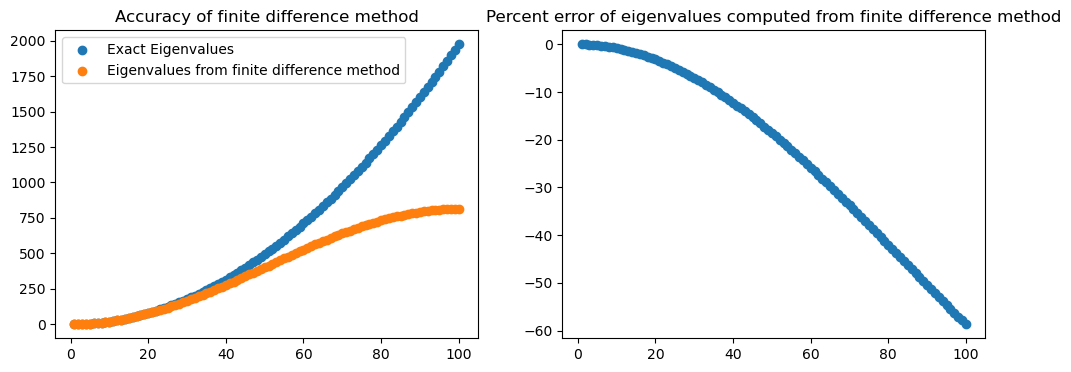

In [209]:
n=np.linspace(1,100,100)
L = 5
def Energy1DPIB(n):
    return Energy1D(n,L)
fig, axs= plt.subplots(1,2,figsize=(12,4))
axs[0].scatter(n,Energy1DPIB(n),label='Exact Eigenvalues')
axs[0].scatter(n,np.sort(eigenvalues)[0:100],label='Eigenvalues from finite difference method')
axs[0].set_title('Accuracy of finite difference method')
percent_error = (np.sort(eigenvalues)[0:100]-Energy1DPIB(n))*100/Energy1DPIB(n)
axs[1].scatter(n,percent_error)
axs[1].set_title('Percent error of eigenvalues computed from finite difference method')
axs[0].legend()
plt.show()

In [210]:
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[1])[0][0]  # Change this to the index you want

estate2 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)

sum((estate2**2)*a)



1.0000000000000002

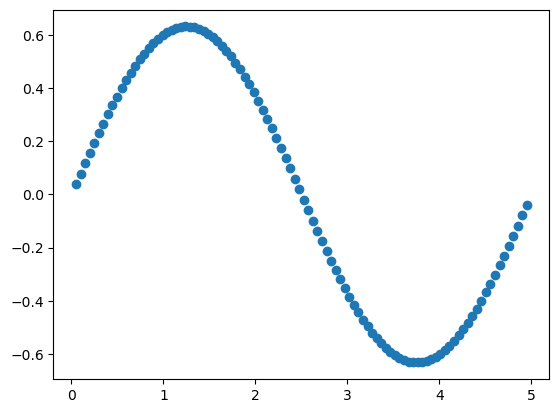

In [211]:
x = []
for i in range(0,nPoints):
    x.append((i+1)*a)
plt.scatter(x,estate2)

In [212]:
#Printing expectation
sum(x*np.conjugate(estate2)*estate2*a)

2.499999999999898

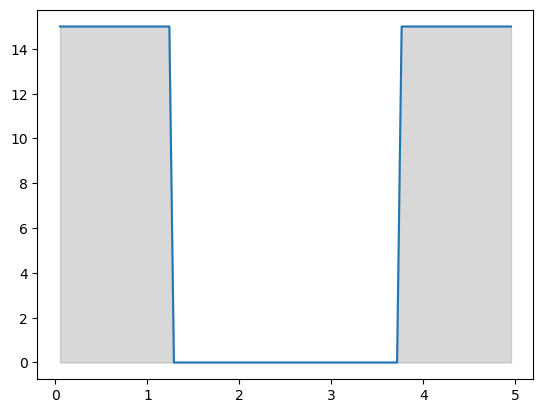

In [213]:
# FINTITE WELL POTENTIAL
Upotn=15
x=np.array(x)
V=np.full_like(x,Upotn)
V[(L/4 <= x) & (x <= 3*L/4)]=0
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.plot(x,V)
plt.show()


In [214]:
for i in range(nPoints):
    hMatr[i,i] = V[i]+2*t
for i in range(nPoints-1):
    hMatr[i,i+1]=-1*t
for i in range(1,nPoints):
    hMatr[i,i-1]=-1*t
eigenvalues, eigenvectors = np.linalg.eig(hMatr)
print("First 6 Eigenvalues:",np.sort(eigenvalues)[:6])


First 6 Eigenvalues: [ 0.609045    2.42118096  5.38381303  9.36886427 13.96720586 17.18516252]


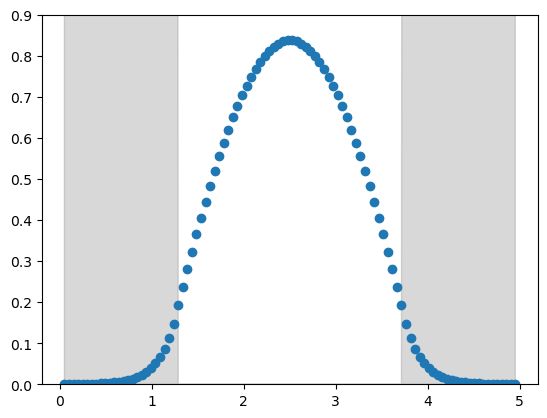

In [215]:
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[0])[0][0]  # Change this to the index you want

estate1 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.scatter(x,estate1)
plt.ylim(0,0.9)
plt.show()


In [216]:
#DECAY NEAR x=0
estate1[:5]


array([0.00010556, 0.00021856, 0.00034698, 0.00049987, 0.00068802])

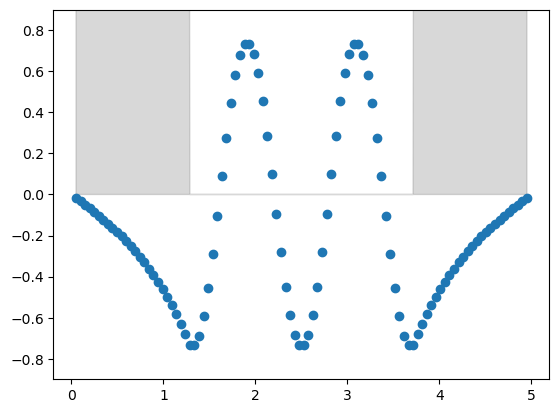

In [225]:
desired_eigenvalue_index = np.where(eigenvalues==np.sort(eigenvalues)[4])[0][0]  

estate5 = eigenvectors[:, desired_eigenvalue_index]/np.sqrt(a)
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.scatter(x,estate5)
plt.ylim(-0.9,0.9)
plt.show()


In [226]:
estate5[:5]


array([-0.01682098, -0.03372711, -0.05080398, -0.06813802, -0.085817  ])